In [2]:
!pip install segmentation_models_pytorch warmup_scheduler albumentations -q


In [1]:
import os
import sys
import random
from glob import glob
import warnings

import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2

sys.path.append('/kaggle/working/notebook/experiment/2d')
from script.helper import *
from script.dataset import *
from script.metrics import *
from script.trainer import *
from script.model import *
from script.loss import *
from script.scheduler import *


## config

In [5]:
class CFG:
    # ============== comp exp name =============
    comp_name = 'vesuvius'
    comp_dir_path = '/kaggle/input/'
    comp_folder_name = 'vesuvius-challenge-ink-detection'

    dataset_path = "/kaggle/working/dataset_train/"
    train_dataset_path = "/kaggle/working/dataset_train/nonflatten/29-34/"

    exp_name = os.getcwd().split('/')[-1]

    # ============== model cfg =============
    model_name = 'Unet'
    backbone = 'efficientnet-b3'
    in_chans = 6

    # ============== pred target =============
    target_size = 1

    # ============== training cfg =============
    size = 224
    tile_size = 224
    stride = tile_size // 2

    train_batch_size = 16  # 32
    valid_batch_size = train_batch_size * 2
    use_amp = True

    scheduler = 'GradualWarmupSchedulerV2'
    # scheduler = 'CosineAnnealingLR'

    epochs = 20  # 15

    warmup_factor = 10
    lr = 1e-4 / warmup_factor

    # ============== fold =============
    metric_direction = 'maximize'  # maximize, 'minimize'

    # ============== fixed =============
    pretrained = True
    inf_weight = 'best'  # 'best'

    min_lr = 1e-6
    weight_decay = 1e-6
    max_grad_norm = 1000

    print_freq = 50
    num_workers = 4

    seed = 42

    # ============== augmentation =============
    train_aug_list = [
        A.Resize(size, size),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.75),
        A.ShiftScaleRotate(p=0.75),
        A.OneOf([
                A.GaussNoise(var_limit=[10, 50]),
                A.GaussianBlur(),
                A.MotionBlur(),
                ], p=0.4),
        A.GridDistortion(num_steps=5, distort_limit=0.3, p=0.5),
        A.CoarseDropout(max_holes=1, max_width=int(size * 0.3), max_height=int(size * 0.3),
                        mask_fill_value=0, p=0.5),
        A.Normalize(
            mean=[0] * in_chans,
            std=[1] * in_chans,
            max_pixel_value=65535,
        ),
        ToTensorV2(transpose_mask=True),
    ]

    valid_aug_list = [
        A.Resize(size, size),
        A.Normalize(
            mean=[0] * in_chans,
            std=[1] * in_chans,
            max_pixel_value=65535,
        ),
        ToTensorV2(transpose_mask=True),
    ]


warnings.filterwarnings("ignore")
torch.backends.cudnn.benchmark = True  # type: ignore

set_seed(CFG.seed)
os.makedirs(f'./{CFG.exp_name}/', exist_ok=True)


## Dataset

In [3]:
def preprocess(image, fragment_i, split_i):
    # image=np.clip(image, a_min=0.15,a_max=0.7)
    return image



len(train_images) = 11194
train_images[0].shape = (256, 256, 6)
train_labels[0].shape = (256, 256, 1)
train_masks[0].shape = (256, 256, 1)

len(valid_images) = 3087
valid_images[0].shape = (256, 256, 6)
valid_labels[0].shape = (256, 256, 1)



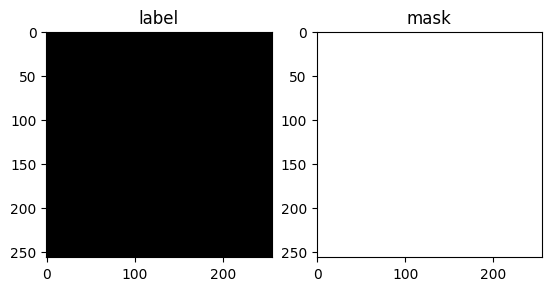

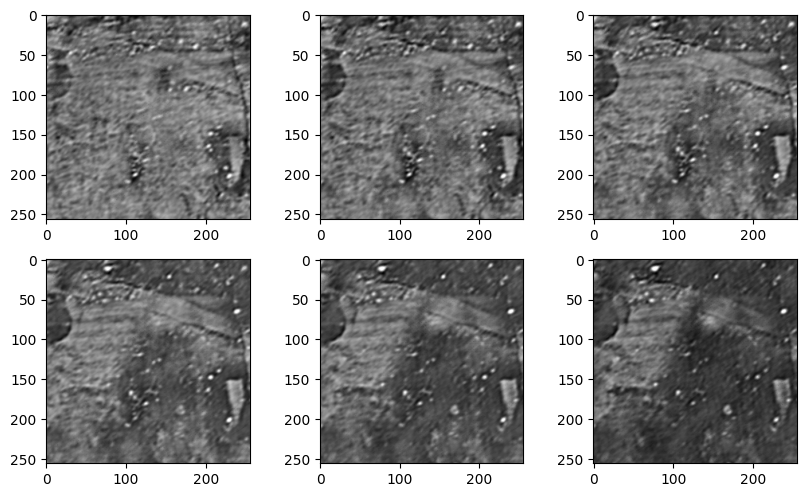

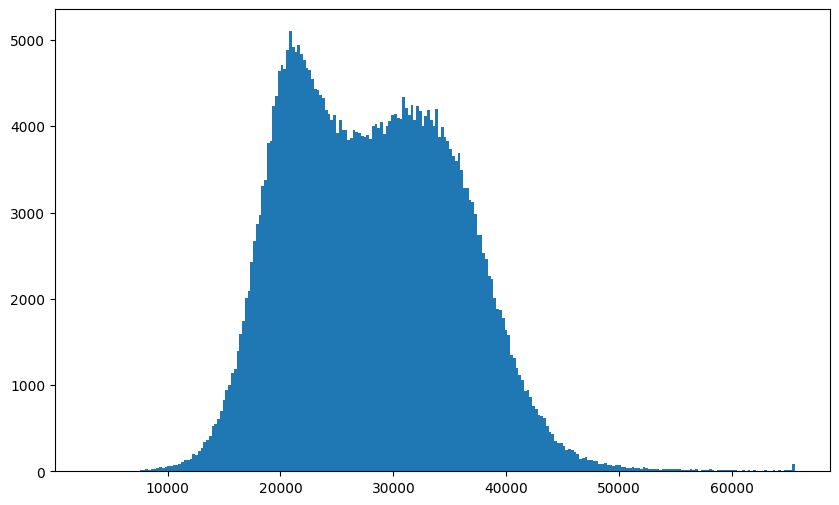

In [7]:
# confirmation

valid_fragment_i = 1
valid_split_i = 0

train_images, train_labels, train_masks, valid_images, valid_labels, valid_xyxys = get_train_valid_dataset(valid_fragment_i, valid_split_i, CFG, preprocess)

print(f"""
{len(train_images) = }
{train_images[0].shape = }
{train_labels[0].shape = }
{train_masks[0].shape = }

{len(valid_images) = }
{valid_images[0].shape = }
{valid_labels[0].shape = }
""")

id = random.randint(0, len(train_labels))
visualize_train_images(id, train_images, train_labels, train_masks)


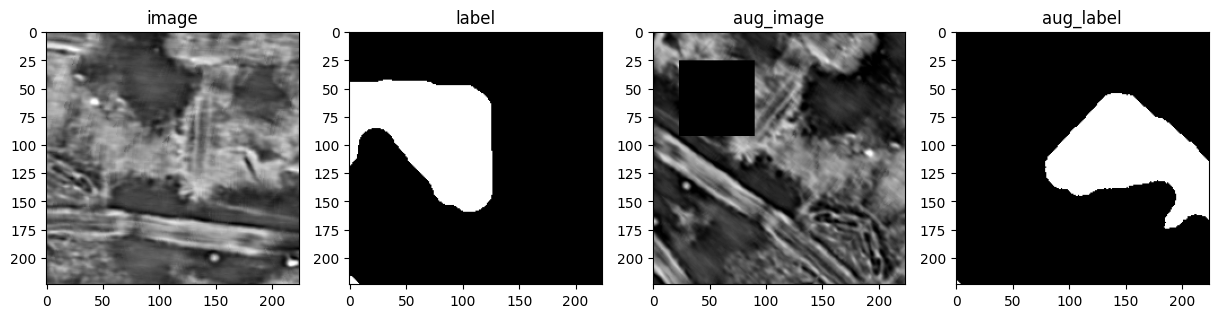

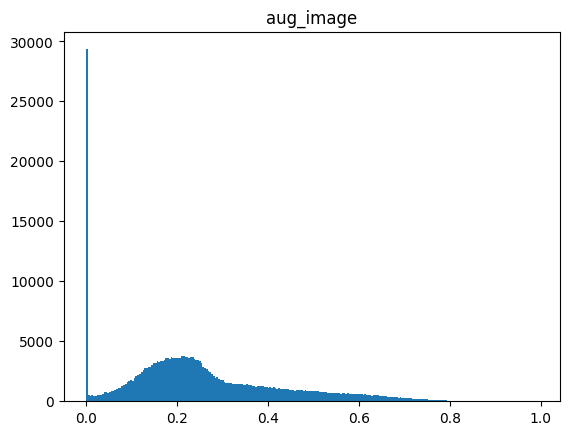

In [7]:
# confirmation
plot_dataset = CustomDataset(train_images, CFG, labels=train_labels)
visualize_dataset(plot_dataset, CFG)


## main

In [4]:
train_and_evaluate(preprocess, CFG)
!curl -X POST -H 'Authorization: Bearer '$LINE -F 'message=セルの実行が終わりました！' https://notify-api.line.me/api/notify

fold: 0


100%|██████████| 131/131 [00:07<00:00, 17.20it/s]


fbeta: 0.2410
Epoch 1 - avg_train_loss: 0.7174  avg_val_loss: 0.5575  avgScore: 0.2410  time: 84s
Epoch 1 - Save Best Loss: 0.5575  Best Score: 0.2410 Model



100%|██████████| 131/131 [00:07<00:00, 17.57it/s]


fbeta: 0.3498
Epoch 2 - avg_train_loss: 0.4823  avg_val_loss: 0.4022  avgScore: 0.3498  time: 81s
Epoch 2 - Save Best Loss: 0.4022  Best Score: 0.3498 Model



100%|██████████| 131/131 [00:07<00:00, 17.36it/s]


fbeta: 0.1601
Epoch 3 - avg_train_loss: 0.2860  avg_val_loss: 0.2595  avgScore: 0.1601  time: 83s



100%|██████████| 131/131 [00:07<00:00, 17.92it/s]


fbeta: 0.4106
Epoch 4 - avg_train_loss: 0.2425  avg_val_loss: 0.2447  avgScore: 0.4106  time: 80s
Epoch 4 - Save Best Loss: 0.2447  Best Score: 0.4106 Model



100%|██████████| 131/131 [00:07<00:00, 17.50it/s]


fbeta: 0.3992
Epoch 5 - avg_train_loss: 0.2239  avg_val_loss: 0.2569  avgScore: 0.3992  time: 81s



100%|██████████| 131/131 [00:07<00:00, 17.51it/s]


fbeta: 0.4800
Epoch 6 - avg_train_loss: 0.2154  avg_val_loss: 0.2443  avgScore: 0.4800  time: 81s
Epoch 6 - Save Best Loss: 0.2443  Best Score: 0.4800 Model



100%|██████████| 131/131 [00:07<00:00, 17.57it/s]


fbeta: 0.5160
Epoch 7 - avg_train_loss: 0.2063  avg_val_loss: 0.2415  avgScore: 0.5160  time: 82s
Epoch 7 - Save Best Loss: 0.2415  Best Score: 0.5160 Model



100%|██████████| 131/131 [00:07<00:00, 17.52it/s]


fbeta: 0.4930
Epoch 8 - avg_train_loss: 0.1998  avg_val_loss: 0.2472  avgScore: 0.4930  time: 82s



100%|██████████| 131/131 [00:07<00:00, 17.57it/s]


fbeta: 0.4520
Epoch 9 - avg_train_loss: 0.1889  avg_val_loss: 0.2658  avgScore: 0.4520  time: 81s



100%|██████████| 131/131 [00:07<00:00, 17.76it/s]


fbeta: 0.5130
Epoch 10 - avg_train_loss: 0.1810  avg_val_loss: 0.2508  avgScore: 0.5130  time: 81s



100%|██████████| 131/131 [00:07<00:00, 17.89it/s]


fbeta: 0.4796
Epoch 11 - avg_train_loss: 0.1754  avg_val_loss: 0.2821  avgScore: 0.4796  time: 79s



100%|██████████| 131/131 [00:07<00:00, 17.23it/s]


fbeta: 0.5085
Epoch 12 - avg_train_loss: 0.1665  avg_val_loss: 0.2747  avgScore: 0.5085  time: 80s



100%|██████████| 131/131 [00:07<00:00, 17.54it/s]


fbeta: 0.4923
Epoch 13 - avg_train_loss: 0.1623  avg_val_loss: 0.2591  avgScore: 0.4923  time: 82s



100%|██████████| 131/131 [00:07<00:00, 17.63it/s]


fbeta: 0.4827
Epoch 14 - avg_train_loss: 0.1584  avg_val_loss: 0.2907  avgScore: 0.4827  time: 82s



100%|██████████| 131/131 [00:07<00:00, 17.63it/s]


fbeta: 0.4858
Epoch 15 - avg_train_loss: 0.1496  avg_val_loss: 0.2954  avgScore: 0.4858  time: 82s



100%|██████████| 131/131 [00:07<00:00, 17.36it/s]


fbeta: 0.4664
Epoch 16 - avg_train_loss: 0.1450  avg_val_loss: 0.2959  avgScore: 0.4664  time: 80s



100%|██████████| 131/131 [00:07<00:00, 18.00it/s]


fbeta: 0.4918
Epoch 17 - avg_train_loss: 0.1416  avg_val_loss: 0.3104  avgScore: 0.4918  time: 82s



100%|██████████| 131/131 [00:07<00:00, 17.58it/s]


fbeta: 0.5007
Epoch 18 - avg_train_loss: 0.1384  avg_val_loss: 0.3053  avgScore: 0.5007  time: 81s



100%|██████████| 131/131 [00:07<00:00, 17.50it/s]


fbeta: 0.5044
Epoch 19 - avg_train_loss: 0.1367  avg_val_loss: 0.3069  avgScore: 0.5044  time: 82s



100%|██████████| 131/131 [00:07<00:00, 17.16it/s]


fbeta: 0.5073
Epoch 20 - avg_train_loss: 0.1343  avg_val_loss: 0.3078  avgScore: 0.5073  time: 79s

fold: 1


100%|██████████| 120/120 [00:07<00:00, 16.85it/s]


fbeta: 0.0935
Epoch 1 - avg_train_loss: 0.4597  avg_val_loss: 0.2596  avgScore: 0.0935  time: 84s
Epoch 1 - Save Best Loss: 0.2596  Best Score: 0.0935 Model



100%|██████████| 120/120 [00:06<00:00, 17.50it/s]


fbeta: 0.1547
Epoch 2 - avg_train_loss: 0.3426  avg_val_loss: 0.2022  avgScore: 0.1547  time: 83s
Epoch 2 - Save Best Loss: 0.2022  Best Score: 0.1547 Model



100%|██████████| 120/120 [00:06<00:00, 17.60it/s]


fbeta: 0.0038
Epoch 3 - avg_train_loss: 0.2819  avg_val_loss: 0.1512  avgScore: 0.0038  time: 82s



100%|██████████| 120/120 [00:07<00:00, 17.12it/s]


fbeta: 0.0012
Epoch 4 - avg_train_loss: 0.2586  avg_val_loss: 0.1366  avgScore: 0.0012  time: 83s



100%|██████████| 120/120 [00:06<00:00, 17.45it/s]


fbeta: 0.0012
Epoch 5 - avg_train_loss: 0.2472  avg_val_loss: 0.1378  avgScore: 0.0012  time: 83s



100%|██████████| 120/120 [00:06<00:00, 17.47it/s]


fbeta: 0.0012
Epoch 6 - avg_train_loss: 0.2394  avg_val_loss: 0.1434  avgScore: 0.0012  time: 83s



100%|██████████| 120/120 [00:06<00:00, 17.58it/s]


fbeta: 0.0042
Epoch 7 - avg_train_loss: 0.2312  avg_val_loss: 0.1472  avgScore: 0.0042  time: 83s



100%|██████████| 120/120 [00:06<00:00, 17.55it/s]


fbeta: 0.4529
Epoch 8 - avg_train_loss: 0.2263  avg_val_loss: 0.1438  avgScore: 0.4529  time: 84s
Epoch 8 - Save Best Loss: 0.1438  Best Score: 0.4529 Model



100%|██████████| 120/120 [00:06<00:00, 17.17it/s]


fbeta: 0.4664
Epoch 9 - avg_train_loss: 0.2155  avg_val_loss: 0.1448  avgScore: 0.4664  time: 83s
Epoch 9 - Save Best Loss: 0.1448  Best Score: 0.4664 Model



100%|██████████| 120/120 [00:06<00:00, 17.63it/s]


fbeta: 0.5150
Epoch 10 - avg_train_loss: 0.2135  avg_val_loss: 0.1470  avgScore: 0.5150  time: 84s
Epoch 10 - Save Best Loss: 0.1470  Best Score: 0.5150 Model



100%|██████████| 120/120 [00:06<00:00, 17.51it/s]


fbeta: 0.5134
Epoch 11 - avg_train_loss: 0.2050  avg_val_loss: 0.1486  avgScore: 0.5134  time: 82s



100%|██████████| 120/120 [00:06<00:00, 17.57it/s]


fbeta: 0.3746
Epoch 12 - avg_train_loss: 0.1964  avg_val_loss: 0.1648  avgScore: 0.3746  time: 84s



100%|██████████| 120/120 [00:06<00:00, 17.50it/s]


fbeta: 0.4673
Epoch 13 - avg_train_loss: 0.1924  avg_val_loss: 0.1665  avgScore: 0.4673  time: 82s



100%|██████████| 120/120 [00:06<00:00, 17.19it/s]


fbeta: 0.5291
Epoch 14 - avg_train_loss: 0.1828  avg_val_loss: 0.1623  avgScore: 0.5291  time: 84s
Epoch 14 - Save Best Loss: 0.1623  Best Score: 0.5291 Model



100%|██████████| 120/120 [00:06<00:00, 17.76it/s]


fbeta: 0.5180
Epoch 15 - avg_train_loss: 0.1713  avg_val_loss: 0.1683  avgScore: 0.5180  time: 83s



100%|██████████| 120/120 [00:06<00:00, 17.57it/s]


fbeta: 0.5149
Epoch 16 - avg_train_loss: 0.1652  avg_val_loss: 0.1667  avgScore: 0.5149  time: 82s



100%|██████████| 120/120 [00:07<00:00, 16.93it/s]


fbeta: 0.5093
Epoch 17 - avg_train_loss: 0.1612  avg_val_loss: 0.1766  avgScore: 0.5093  time: 83s



100%|██████████| 120/120 [00:06<00:00, 17.52it/s]


fbeta: 0.5153
Epoch 18 - avg_train_loss: 0.1553  avg_val_loss: 0.1745  avgScore: 0.5153  time: 85s



100%|██████████| 120/120 [00:06<00:00, 17.72it/s]


fbeta: 0.5141
Epoch 19 - avg_train_loss: 0.1544  avg_val_loss: 0.1782  avgScore: 0.5141  time: 85s



100%|██████████| 120/120 [00:06<00:00, 17.58it/s]


fbeta: 0.5056
Epoch 20 - avg_train_loss: 0.1514  avg_val_loss: 0.1750  avgScore: 0.5056  time: 83s

fold: 2


100%|██████████| 120/120 [00:06<00:00, 17.53it/s]


fbeta: 0.2090
Epoch 1 - avg_train_loss: 0.6192  avg_val_loss: 0.5283  avgScore: 0.2090  time: 84s
Epoch 1 - Save Best Loss: 0.5283  Best Score: 0.2090 Model



100%|██████████| 120/120 [00:07<00:00, 16.91it/s]


fbeta: 0.2683
Epoch 2 - avg_train_loss: 0.3931  avg_val_loss: 0.4183  avgScore: 0.2683  time: 85s
Epoch 2 - Save Best Loss: 0.4183  Best Score: 0.2683 Model



100%|██████████| 120/120 [00:06<00:00, 17.15it/s]


fbeta: 0.4006
Epoch 3 - avg_train_loss: 0.2547  avg_val_loss: 0.3492  avgScore: 0.4006  time: 84s
Epoch 3 - Save Best Loss: 0.3492  Best Score: 0.4006 Model



100%|██████████| 120/120 [00:06<00:00, 17.81it/s]


fbeta: 0.4118
Epoch 4 - avg_train_loss: 0.2184  avg_val_loss: 0.3396  avgScore: 0.4118  time: 84s
Epoch 4 - Save Best Loss: 0.3396  Best Score: 0.4118 Model



100%|██████████| 120/120 [00:06<00:00, 17.48it/s]


fbeta: 0.4299
Epoch 5 - avg_train_loss: 0.1986  avg_val_loss: 0.3550  avgScore: 0.4299  time: 82s
Epoch 5 - Save Best Loss: 0.3550  Best Score: 0.4299 Model



100%|██████████| 120/120 [00:07<00:00, 17.11it/s]


fbeta: 0.4840
Epoch 6 - avg_train_loss: 0.1926  avg_val_loss: 0.3455  avgScore: 0.4840  time: 84s
Epoch 6 - Save Best Loss: 0.3455  Best Score: 0.4840 Model



100%|██████████| 120/120 [00:06<00:00, 17.43it/s]


fbeta: 0.4530
Epoch 7 - avg_train_loss: 0.1846  avg_val_loss: 0.3665  avgScore: 0.4530  time: 84s



100%|██████████| 120/120 [00:06<00:00, 17.89it/s]


fbeta: 0.5178
Epoch 8 - avg_train_loss: 0.1766  avg_val_loss: 0.3576  avgScore: 0.5178  time: 83s
Epoch 8 - Save Best Loss: 0.3576  Best Score: 0.5178 Model



100%|██████████| 120/120 [00:06<00:00, 17.80it/s]


fbeta: 0.4750
Epoch 9 - avg_train_loss: 0.1687  avg_val_loss: 0.3974  avgScore: 0.4750  time: 82s



100%|██████████| 120/120 [00:06<00:00, 17.80it/s]


fbeta: 0.5130
Epoch 10 - avg_train_loss: 0.1622  avg_val_loss: 0.3954  avgScore: 0.5130  time: 82s



100%|██████████| 120/120 [00:06<00:00, 17.52it/s]


fbeta: 0.5272
Epoch 11 - avg_train_loss: 0.1560  avg_val_loss: 0.3677  avgScore: 0.5272  time: 83s
Epoch 11 - Save Best Loss: 0.3677  Best Score: 0.5272 Model



100%|██████████| 120/120 [00:06<00:00, 17.86it/s]


fbeta: 0.5426
Epoch 12 - avg_train_loss: 0.1486  avg_val_loss: 0.3834  avgScore: 0.5426  time: 82s
Epoch 12 - Save Best Loss: 0.3834  Best Score: 0.5426 Model



100%|██████████| 120/120 [00:06<00:00, 17.96it/s]


fbeta: 0.4884
Epoch 13 - avg_train_loss: 0.1452  avg_val_loss: 0.4046  avgScore: 0.4884  time: 83s



100%|██████████| 120/120 [00:06<00:00, 17.87it/s]


fbeta: 0.5307
Epoch 14 - avg_train_loss: 0.1386  avg_val_loss: 0.4083  avgScore: 0.5307  time: 81s



100%|██████████| 120/120 [00:06<00:00, 17.60it/s]


fbeta: 0.5162
Epoch 15 - avg_train_loss: 0.1334  avg_val_loss: 0.4520  avgScore: 0.5162  time: 83s



100%|██████████| 120/120 [00:06<00:00, 17.88it/s]


fbeta: 0.5317
Epoch 16 - avg_train_loss: 0.1269  avg_val_loss: 0.4347  avgScore: 0.5317  time: 82s



100%|██████████| 120/120 [00:06<00:00, 17.57it/s]


fbeta: 0.5544
Epoch 17 - avg_train_loss: 0.1241  avg_val_loss: 0.4067  avgScore: 0.5544  time: 82s
Epoch 17 - Save Best Loss: 0.4067  Best Score: 0.5544 Model



100%|██████████| 120/120 [00:06<00:00, 17.60it/s]


fbeta: 0.5359
Epoch 18 - avg_train_loss: 0.1228  avg_val_loss: 0.4255  avgScore: 0.5359  time: 83s



100%|██████████| 120/120 [00:07<00:00, 17.12it/s]


fbeta: 0.5478
Epoch 19 - avg_train_loss: 0.1214  avg_val_loss: 0.4369  avgScore: 0.5478  time: 84s



100%|██████████| 120/120 [00:06<00:00, 17.54it/s]


fbeta: 0.5533
Epoch 20 - avg_train_loss: 0.1210  avg_val_loss: 0.4426  avgScore: 0.5533  time: 84s

fold: 3


100%|██████████| 120/120 [00:07<00:00, 17.13it/s]


fbeta: 0.1969
Epoch 1 - avg_train_loss: 0.7975  avg_val_loss: 0.5606  avgScore: 0.1969  time: 83s
Epoch 1 - Save Best Loss: 0.5606  Best Score: 0.1969 Model



100%|██████████| 120/120 [00:06<00:00, 17.43it/s]


fbeta: 0.0041
Epoch 2 - avg_train_loss: 0.4394  avg_val_loss: 0.4566  avgScore: 0.0041  time: 84s



100%|██████████| 120/120 [00:06<00:00, 17.39it/s]


fbeta: 0.0000
Epoch 3 - avg_train_loss: 0.2912  avg_val_loss: 0.3463  avgScore: 0.0000  time: 85s



100%|██████████| 120/120 [00:06<00:00, 17.50it/s]


fbeta: 0.1491
Epoch 4 - avg_train_loss: 0.2312  avg_val_loss: 0.3301  avgScore: 0.1491  time: 85s



100%|██████████| 120/120 [00:06<00:00, 17.87it/s]


fbeta: 0.3680
Epoch 5 - avg_train_loss: 0.2190  avg_val_loss: 0.3249  avgScore: 0.3680  time: 83s
Epoch 5 - Save Best Loss: 0.3249  Best Score: 0.3680 Model



100%|██████████| 120/120 [00:06<00:00, 17.87it/s]


fbeta: 0.2013
Epoch 6 - avg_train_loss: 0.2106  avg_val_loss: 0.3377  avgScore: 0.2013  time: 82s



100%|██████████| 120/120 [00:06<00:00, 17.50it/s]


fbeta: 0.5556
Epoch 7 - avg_train_loss: 0.2037  avg_val_loss: 0.3048  avgScore: 0.5556  time: 83s
Epoch 7 - Save Best Loss: 0.3048  Best Score: 0.5556 Model



100%|██████████| 120/120 [00:07<00:00, 16.89it/s]


fbeta: 0.4873
Epoch 8 - avg_train_loss: 0.1957  avg_val_loss: 0.3280  avgScore: 0.4873  time: 86s



100%|██████████| 120/120 [00:06<00:00, 17.39it/s]


fbeta: 0.5463
Epoch 9 - avg_train_loss: 0.1870  avg_val_loss: 0.3092  avgScore: 0.5463  time: 85s



100%|██████████| 120/120 [00:06<00:00, 17.53it/s]


fbeta: 0.4994
Epoch 10 - avg_train_loss: 0.1803  avg_val_loss: 0.3304  avgScore: 0.4994  time: 84s



100%|██████████| 120/120 [00:06<00:00, 17.48it/s]


fbeta: 0.5677
Epoch 11 - avg_train_loss: 0.1699  avg_val_loss: 0.3229  avgScore: 0.5677  time: 84s
Epoch 11 - Save Best Loss: 0.3229  Best Score: 0.5677 Model



100%|██████████| 120/120 [00:06<00:00, 17.15it/s]


fbeta: 0.5456
Epoch 12 - avg_train_loss: 0.1674  avg_val_loss: 0.3320  avgScore: 0.5456  time: 84s



100%|██████████| 120/120 [00:06<00:00, 17.48it/s]


fbeta: 0.5913
Epoch 13 - avg_train_loss: 0.1573  avg_val_loss: 0.3268  avgScore: 0.5913  time: 85s
Epoch 13 - Save Best Loss: 0.3268  Best Score: 0.5913 Model



100%|██████████| 120/120 [00:06<00:00, 17.54it/s]


fbeta: 0.5722
Epoch 14 - avg_train_loss: 0.1523  avg_val_loss: 0.3296  avgScore: 0.5722  time: 83s



100%|██████████| 120/120 [00:06<00:00, 17.50it/s]


fbeta: 0.5503
Epoch 15 - avg_train_loss: 0.1474  avg_val_loss: 0.3535  avgScore: 0.5503  time: 84s



100%|██████████| 120/120 [00:07<00:00, 16.94it/s]


fbeta: 0.5893
Epoch 16 - avg_train_loss: 0.1426  avg_val_loss: 0.3479  avgScore: 0.5893  time: 85s



100%|██████████| 120/120 [00:06<00:00, 17.58it/s]


fbeta: 0.5952
Epoch 17 - avg_train_loss: 0.1404  avg_val_loss: 0.3519  avgScore: 0.5952  time: 85s
Epoch 17 - Save Best Loss: 0.3519  Best Score: 0.5952 Model



100%|██████████| 120/120 [00:06<00:00, 17.46it/s]


fbeta: 0.5817
Epoch 18 - avg_train_loss: 0.1353  avg_val_loss: 0.3699  avgScore: 0.5817  time: 83s



100%|██████████| 120/120 [00:06<00:00, 17.53it/s]


fbeta: 0.5725
Epoch 19 - avg_train_loss: 0.1334  avg_val_loss: 0.3649  avgScore: 0.5725  time: 85s



100%|██████████| 120/120 [00:06<00:00, 17.52it/s]


fbeta: 0.5799
Epoch 20 - avg_train_loss: 0.1318  avg_val_loss: 0.3654  avgScore: 0.5799  time: 85s

fold: 4


100%|██████████| 99/99 [00:05<00:00, 16.93it/s]


fbeta: 0.1463
Epoch 1 - avg_train_loss: 0.8252  avg_val_loss: 0.5082  avgScore: 0.1463  time: 89s
Epoch 1 - Save Best Loss: 0.5082  Best Score: 0.1463 Model



100%|██████████| 99/99 [00:05<00:00, 18.03it/s]


fbeta: 0.0015
Epoch 2 - avg_train_loss: 0.4657  avg_val_loss: 0.3821  avgScore: 0.0015  time: 84s



100%|██████████| 99/99 [00:05<00:00, 17.96it/s]


fbeta: 0.0859
Epoch 3 - avg_train_loss: 0.3377  avg_val_loss: 0.2437  avgScore: 0.0859  time: 83s



100%|██████████| 99/99 [00:05<00:00, 17.96it/s]


fbeta: 0.3974
Epoch 4 - avg_train_loss: 0.2718  avg_val_loss: 0.2582  avgScore: 0.3974  time: 85s
Epoch 4 - Save Best Loss: 0.2582  Best Score: 0.3974 Model



100%|██████████| 99/99 [00:05<00:00, 17.13it/s]


fbeta: 0.4277
Epoch 5 - avg_train_loss: 0.2455  avg_val_loss: 0.2366  avgScore: 0.4277  time: 87s
Epoch 5 - Save Best Loss: 0.2366  Best Score: 0.4277 Model



100%|██████████| 99/99 [00:05<00:00, 17.39it/s]


fbeta: 0.5375
Epoch 6 - avg_train_loss: 0.2333  avg_val_loss: 0.2054  avgScore: 0.5375  time: 87s
Epoch 6 - Save Best Loss: 0.2054  Best Score: 0.5375 Model



100%|██████████| 99/99 [00:05<00:00, 17.61it/s]


fbeta: 0.3513
Epoch 7 - avg_train_loss: 0.2246  avg_val_loss: 0.3004  avgScore: 0.3513  time: 86s



100%|██████████| 99/99 [00:05<00:00, 17.69it/s]


fbeta: 0.4430
Epoch 8 - avg_train_loss: 0.2189  avg_val_loss: 0.2505  avgScore: 0.4430  time: 87s



100%|██████████| 99/99 [00:05<00:00, 17.29it/s]


fbeta: 0.5375
Epoch 9 - avg_train_loss: 0.2028  avg_val_loss: 0.2007  avgScore: 0.5375  time: 88s
Epoch 9 - Save Best Loss: 0.2007  Best Score: 0.5375 Model



100%|██████████| 99/99 [00:05<00:00, 17.63it/s]


fbeta: 0.4414
Epoch 10 - avg_train_loss: 0.1947  avg_val_loss: 0.2474  avgScore: 0.4414  time: 87s



100%|██████████| 99/99 [00:05<00:00, 17.80it/s]


fbeta: 0.5016
Epoch 11 - avg_train_loss: 0.1939  avg_val_loss: 0.2147  avgScore: 0.5016  time: 85s



100%|██████████| 99/99 [00:05<00:00, 18.12it/s]


fbeta: 0.5418
Epoch 12 - avg_train_loss: 0.1800  avg_val_loss: 0.2070  avgScore: 0.5418  time: 86s
Epoch 12 - Save Best Loss: 0.2070  Best Score: 0.5418 Model



100%|██████████| 99/99 [00:05<00:00, 17.35it/s]


fbeta: 0.4570
Epoch 13 - avg_train_loss: 0.1757  avg_val_loss: 0.2462  avgScore: 0.4570  time: 87s



100%|██████████| 99/99 [00:05<00:00, 17.63it/s]


fbeta: 0.4259
Epoch 14 - avg_train_loss: 0.1704  avg_val_loss: 0.2683  avgScore: 0.4259  time: 86s



100%|██████████| 99/99 [00:05<00:00, 18.05it/s]


fbeta: 0.4733
Epoch 15 - avg_train_loss: 0.1656  avg_val_loss: 0.2411  avgScore: 0.4733  time: 85s



100%|██████████| 99/99 [00:05<00:00, 17.40it/s]


fbeta: 0.4381
Epoch 16 - avg_train_loss: 0.1563  avg_val_loss: 0.2588  avgScore: 0.4381  time: 87s



100%|██████████| 99/99 [00:05<00:00, 17.66it/s]


fbeta: 0.4260
Epoch 17 - avg_train_loss: 0.1585  avg_val_loss: 0.2753  avgScore: 0.4260  time: 86s



100%|██████████| 99/99 [00:05<00:00, 17.73it/s]


fbeta: 0.4465
Epoch 18 - avg_train_loss: 0.1527  avg_val_loss: 0.2585  avgScore: 0.4465  time: 88s



100%|██████████| 99/99 [00:05<00:00, 18.05it/s]


fbeta: 0.4712
Epoch 19 - avg_train_loss: 0.1481  avg_val_loss: 0.2449  avgScore: 0.4712  time: 87s



100%|██████████| 99/99 [00:05<00:00, 17.62it/s]


fbeta: 0.4494
Epoch 20 - avg_train_loss: 0.1468  avg_val_loss: 0.2582  avgScore: 0.4494  time: 88s

{"status":200,"message":"ok"}

In [6]:
gt_area_list, dice_list, valid_label_gt_list, label_pred_list = inference_evaluation(CFG)


fbeta: 0.5160
fbeta: 0.5291
fbeta: 0.5544
fbeta: 0.5952
fbeta: 0.5418


In [7]:
print(f"{dice_evaluation(gt_area_list, dice_list):.4f}")


0.5470


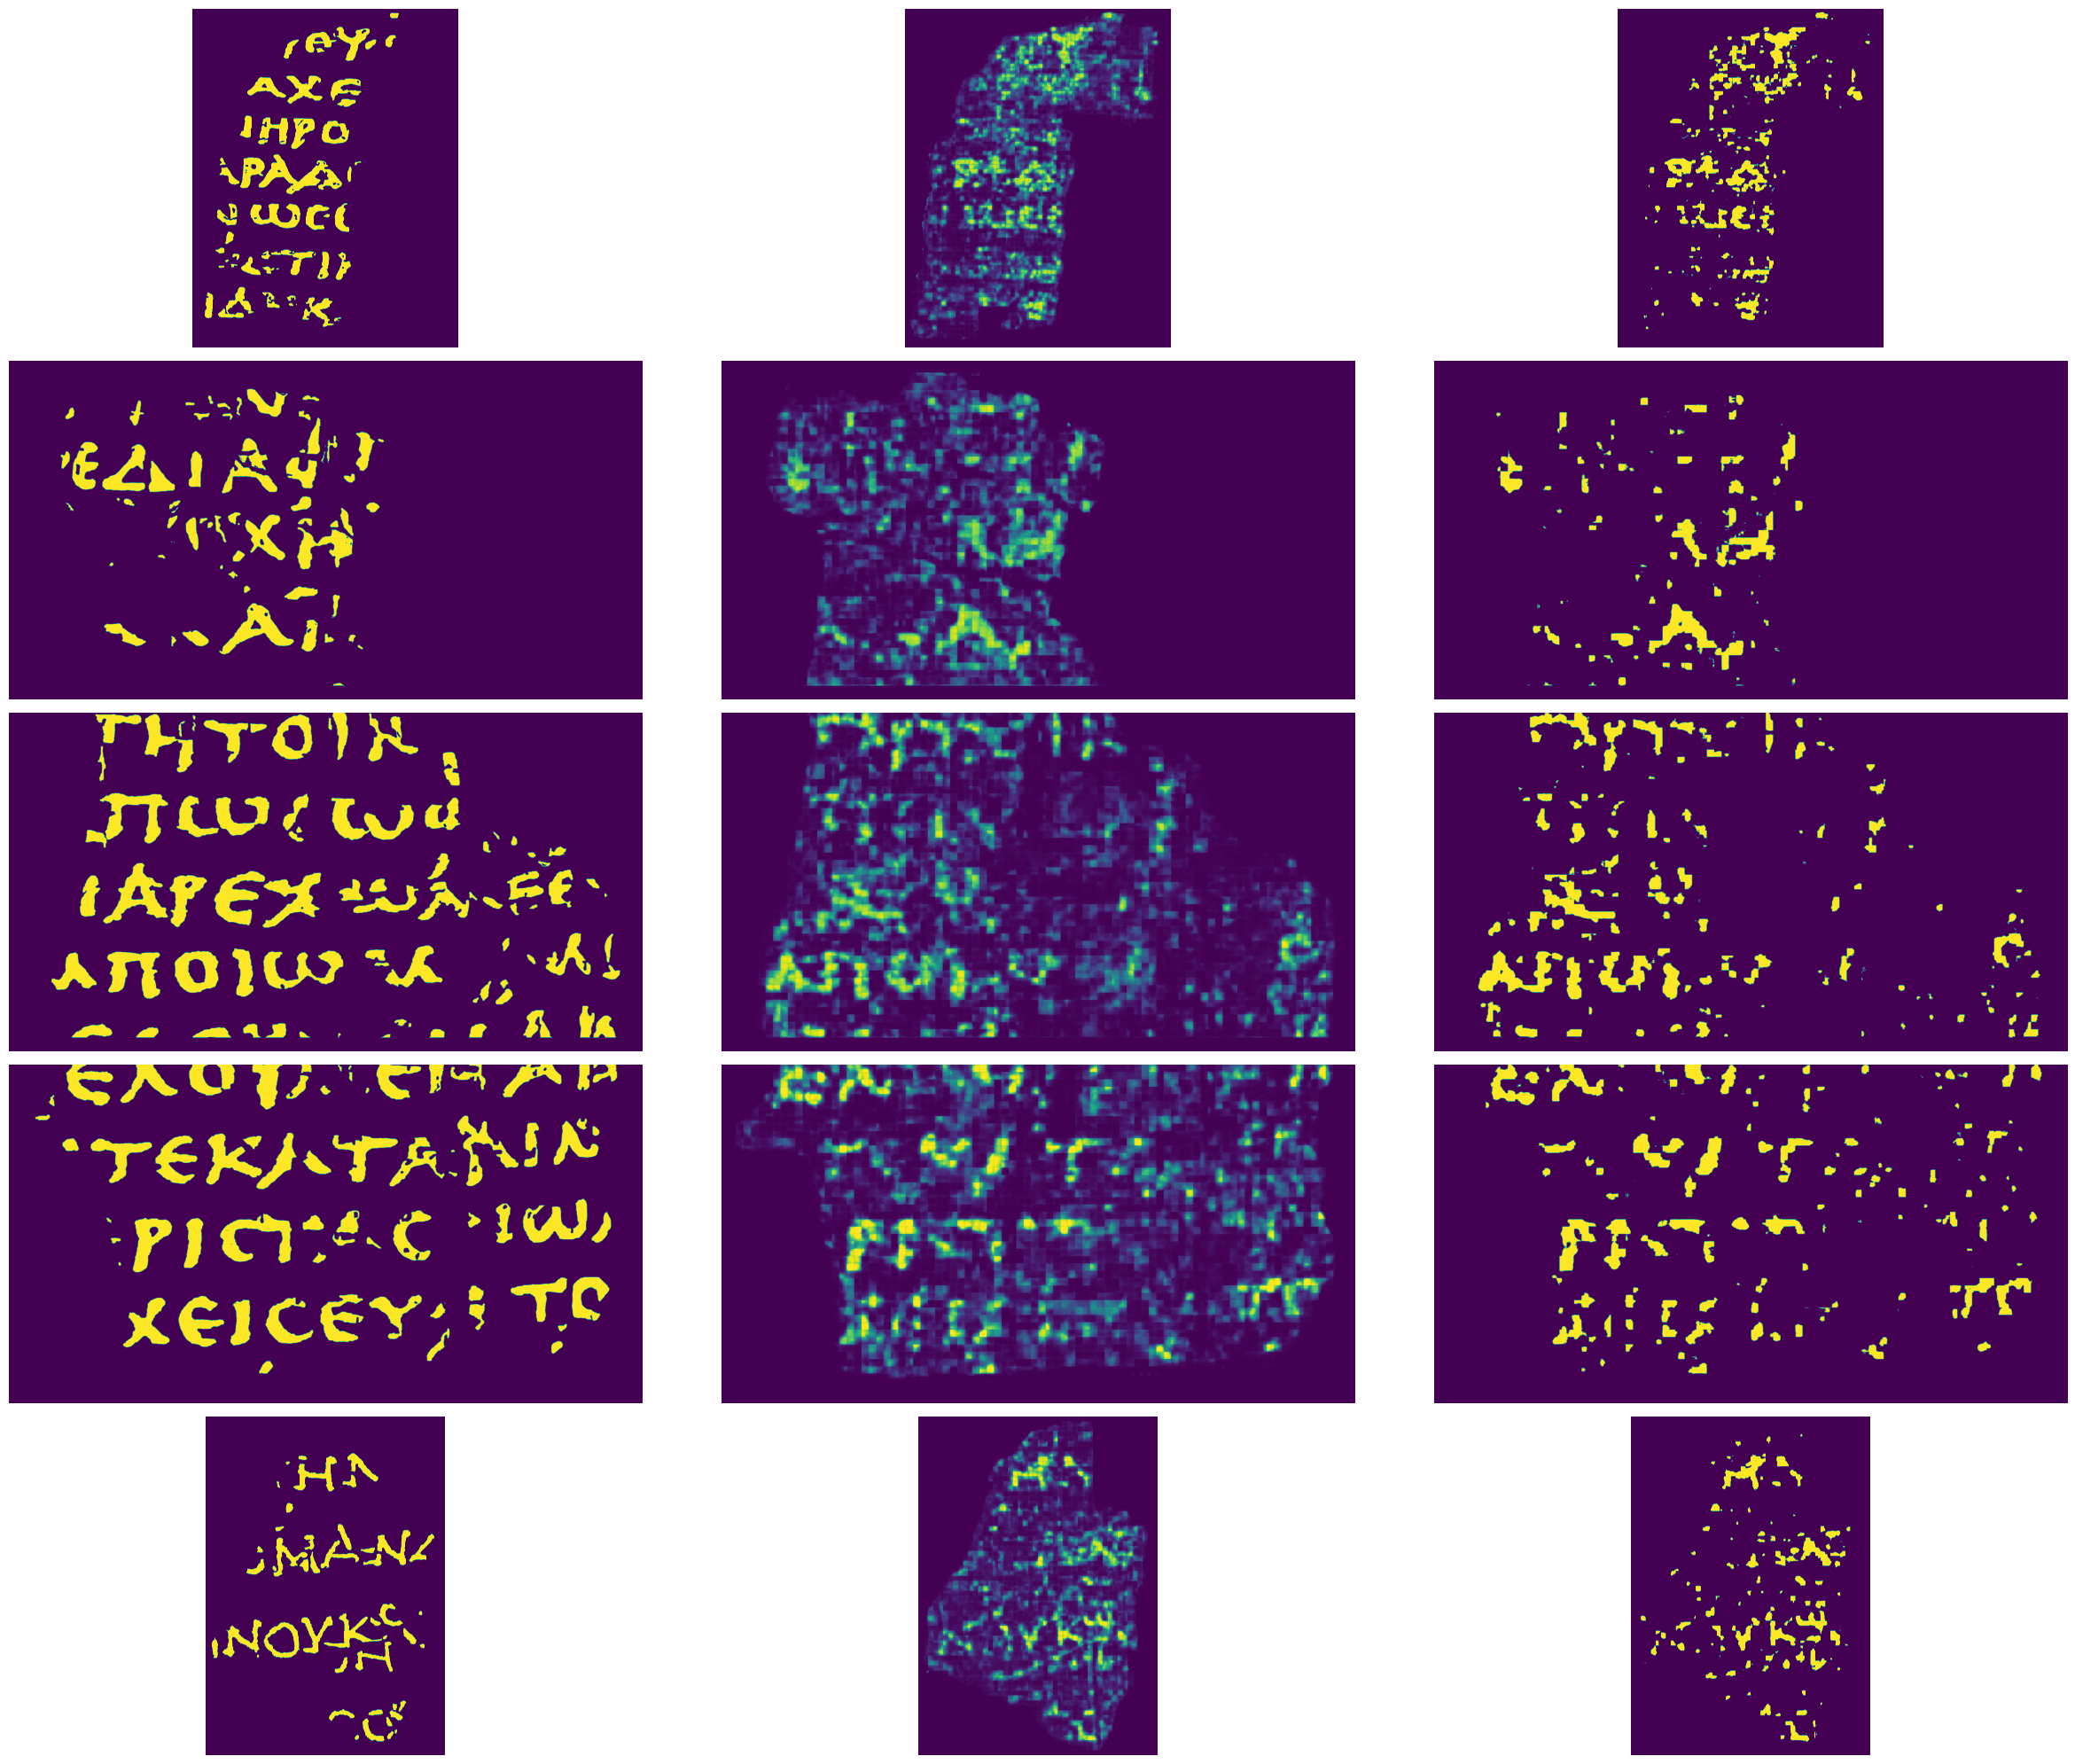

In [8]:
plot_inference(valid_label_gt_list, label_pred_list, CFG)